## Import & Check Data

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", palette="Spectral", \
        style="darkgrid", font_scale=1.5, color_codes=True)

print([file for file in os.listdir('./') if file.endswith('.csv')])

['creditcardcsvpresent.csv', 'heart.csv', 'Mall_Customers.csv', 'USA_Housing.csv']


In [5]:
dataset = pd.read_csv('./Mall_Customers.csv', index_col='CustomerID')

In [6]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Check Null

In [9]:
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Remove Duplicated Value

In [10]:
dataset.drop_duplicates(inplace=True)

#### Only use Annual Income, Spending Score 

In [11]:
X = dataset.iloc[:, [2,3]].values

### Choosing the Eps, MinPts

사용할 Eps는 8에서 12.75 범위이며, 간격은 0.25 입니다.  
또한 minPts는 3에서 10까지의 값입니다.  

- *DBSCAN_param_list*는 eps_list와 minPts_list의 가능한 조합을 모두 나타낸 것입니다.  

In [92]:
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics.cluster import silhouette_score

eps_list = np.arange(8, 12.75, 0.25)
minPts_list = np.arange(3, 10)

DBSCAN_param_list = list(product(eps_list, minPts_list))

- *num_of_clusters*는 eps와 minPts가 각각 p[0], p[1]일때의 클러스터 개수를 담습니다.  
- *silhouette_co*는 Clustering 모델을 평가하는 지표 중 하나인 **silhouette coefficient**를 담는 리스트입니다.  

**silhouette coefficient**는 클러스터링 결과와 비교할 정답값이 없는 경우 사용할 수 있으며,  
cluster의 밀집 정도를 계산합니다.

In [93]:
num_of_clusters = []
silhouette_co =[]

for p in DBSCAN_param_list :
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    X_dbscan = dbscan.fit(X)
    
    num_of_clusters.append(len(np.unique(X_dbscan.labels_)))
    silhouette_co.append(silhouette_score(X, X_dbscan.labels_))

Silhouette Score가 가장 높은 Eps와 MinPts 조합을 선택합니다.

In [94]:
max_idx = np.argmax(np.array(silhouette_co))
print('Silhouette Score : {0:0.4f}'.format(np.max(np.array(silhouette_co))))
print('Eps : {}, MinPts : {}'.format(DBSCAN_param_list[max_idx][0],DBSCAN_param_list[max_idx][1]))
print('Cluster Num : {}'.format(num_of_clusters[max_idx]))

Silhouette Score : 0.4804
Eps : 9.25, MinPts : 3
Cluster Num : 8


In [97]:
dbscan = DBSCAN(eps = DBSCAN_param_list[max_idx][0], \
                min_samples= DBSCAN_param_list[max_idx][1])
y_dbscan = dbscan.fit_predict(X)

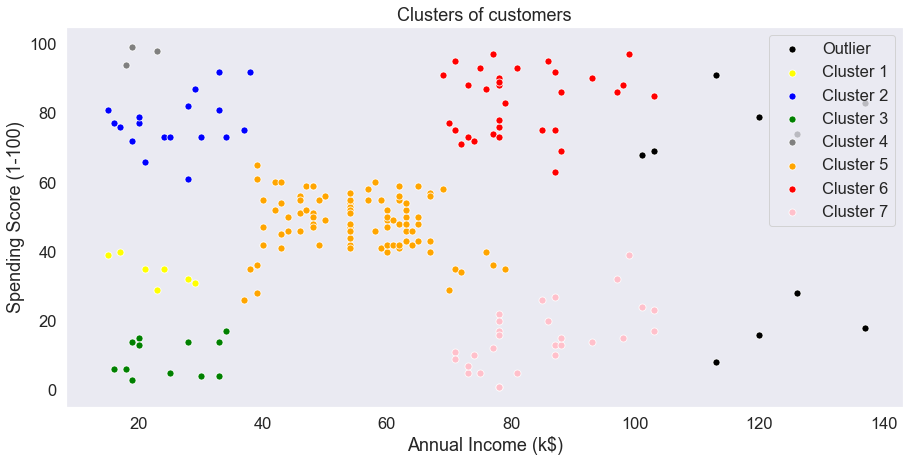

In [98]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color= 'black', \
               label = 'Outlier', s = 50)
sns.scatterplot(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], color= 'yellow', \
               label = 'Cluster 1', s = 50)
sns.scatterplot(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], color = 'blue', \
               label = 'Cluster 2', s = 50)
sns.scatterplot(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], color = 'green', \
               label = 'Cluster 3', s= 50)
sns.scatterplot(X[y_dbscan == 3, 0], X[y_dbscan == 3, 1], color = 'grey', \
               label = 'Cluster 4', s = 50)
sns.scatterplot(X[y_dbscan == 4, 0], X[y_dbscan == 4, 1], color = 'orange', \
               label = 'Cluster 5', s= 50)
sns.scatterplot(X[y_dbscan == 5, 0], X[y_dbscan == 5, 1], color = 'red', \
               label = 'Cluster 6', s= 50)
sns.scatterplot(X[y_dbscan == 6, 0], X[y_dbscan == 6, 1], color = 'pink', \
               label = 'Cluster 7', s= 50)

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()